In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PySpice
# import PySpice.Logging.Logging as Logging
# logger = Logging.setup_logging()

from PySpice import SpiceLibrary, Circuit, Simulator, SubCircuit
from PySpice.Unit import *

PySpice.show_version()

PySpice Version 1.6


In [2]:
class X_ShuntZenerThermistor(SubCircuit):
	_nodes_ = ('K', 'A')
	def __init__(self,name, R1, R2):
		super().__init__()
		self.R(1, 'K', '1', R1)
		self.R(2, '1', 'A', R2)
		self.X('DZ','LM4041_N_ADJD1P233','1','K','A')

In [3]:
Vout_center=1.8
Vbatt_nominal=3.7
Vref=1.233
Ntherm=6 # maximum number of thermistor or-ed
Rs=680
over_factor=3 # higher means zener works more
Rsum=Rs*Vout_center/(Vbatt_nominal-Vout_center)*Ntherm*over_factor
r=Vout_center/Vref-1
R1=Rsum/(1+r)
R2=r*R1
R0=R2
T0=25+273
beta=4300
RT=lambda T: R0*np.exp(-beta*(1/T0-1/T))

Vbatt=2.55

print('R1',R1)
print('R2',R2)

R1 7943.115789473683
R2 3652.673684210526


In [8]:
c = Circuit('Shunt Thermistor')
c.include('spice/LM4041_N_ADJD1P233_TRANS.lib')
c.V('batt','batt',0,Vbatt)
c.R('S','batt','out',Rs)

for i in range(3):
	c.X(f'reg{i}','LM4041_N_ADJD1P233','1','out','0')
	c.R(1+2*i,'out','1',R1)
	c.R(2+2*i,'1','0',R2)

# hotspot
c.X(f'reg_hot','LM4041_N_ADJD1P233','1','out','0')
c.R('11','out','1',R1)
c.R('12','1','0',R2)

# print(c)

Resistor R12

In [9]:
simulator = Simulator.factory()
simulation = simulator.simulation(c)
# print(simulation)

Newer Ngspice version that could be unsupported 36


In [10]:
analysis = simulation.operating_point()

In [11]:
float(analysis['out'])

1.823405181480955

In [12]:
# Temperature sweep
Ts=np.linspace(-40.,120,40)+273
Vouts=np.zeros_like(Ts)
simulator = Simulator.factory()
for i_T,T in enumerate(Ts):
	print('Sim',i_T/40)
	# define circuit
	c = Circuit('Shunt Thermistor')
	c.include('spice/LM4041_N_ADJD1P233_TRANS.lib')
	c.V('batt','batt',0,Vbatt)
	c.R('S','batt','out',Rs)

	for i in range(5):
		c.X(f'reg{i}','LM4041_N_ADJD1P233','1','out','0')
		c.R(1+2*i,'out','1',R1)
		c.R(2+2*i,'1','0',R2)

	# hotspot
	c.X(f'reg_hot','LM4041_N_ADJD1P233','1','out','0')
	c.R('11','out','1',R1)
	c.R('12','1','0',RT(T))

	# Simulate it
	simulation = simulator.simulation(c)
	res = simulation.operating_point()
	Vouts[i_T]=float(res['out'])
	# print(Vouts[i_T])

Sim 0.0
1.853667678054331
Sim 0.025
1.8533840316040648
Sim 0.05
1.8530092357858328
Sim 0.075
1.8525189512040119
Sim 0.1
1.8518836763108946
Sim 0.125
1.8510679326853174
Sim 0.15
1.8500293409418795
Sim 0.175
1.8487175404576723
Sim 0.2
1.84707286639308
Sim 0.225
1.8450246373618742
Sim 0.25
1.8424888337929488
Sim 0.275
1.8393649089745245
Sim 0.3
1.8355316283497307
Sim 0.325
1.830842548186212
Sim 0.35
1.8251235932150407
Sim 0.375
1.818178190505709
Sim 0.4
1.8098068692362694
Sim 0.425
1.799842209352493
Sim 0.45
1.777772714856845
Sim 0.475
1.7539277785090461
Sim 0.5
1.7286448239736816
Sim 0.525
1.7022330099028191
Sim 0.55
1.6750446082934483
Sim 0.575
1.6474556439810022
Sim 0.6
1.6198449838277822
Sim 0.625
1.592574264730504
Sim 0.65
1.5659707642505778
Sim 0.675
1.540314683607014
Sim 0.7
1.5158315114443
Sim 0.725
1.4926893632734741
Sim 0.75
1.4710005943744413
Sim 0.775
1.4508266348386527
Sim 0.8
1.432184890928996
Sim 0.825
1.4150566427366007
Sim 0.85
1.3993950671230375
Sim 0.875
1.3851327795585

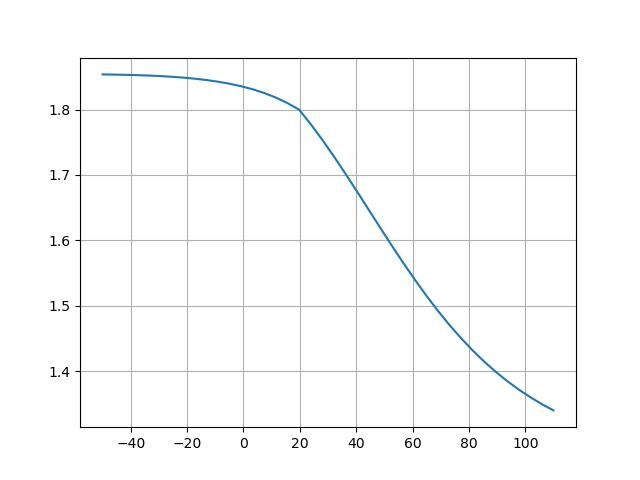

In [13]:
%matplotlib widget
plt.plot(Ts-283,Vouts)
plt.grid()

In [40]:
float(res['out'])

1.3404033139264908

In [ ]:
# Cost
N_block=
N_thermistor_block=
C_NTC=
C_block=
Vouts